In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
import seaborn as sns

In [2]:
df_desbalanceado = pd.read_csv('Dataset geral.csv', sep = '|', encoding = 'utf-8-sig')
df_under = pd.read_csv('Dataset Random Undersampling.csv', index_col=0, sep = '|', encoding = 'utf-8-sig')
df_over = pd.read_csv('Dataset SMOTE Oversampling.csv', index_col=0, sep = '|', encoding = 'utf-8-sig')

C:\Users\jessi\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


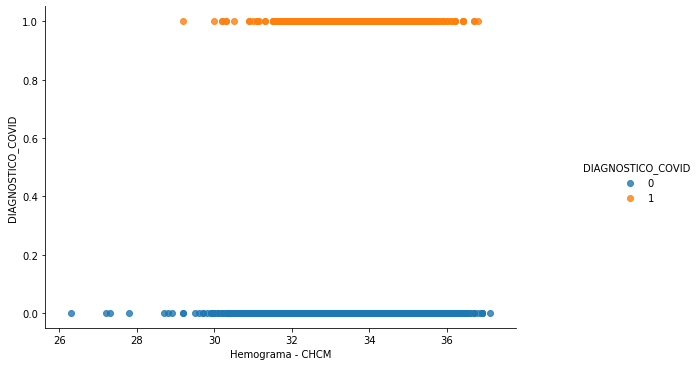

In [3]:
sns.lmplot(df_desbalanceado.columns[10], 'DIAGNOSTICO_COVID', df_desbalanceado, hue='DIAGNOSTICO_COVID', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

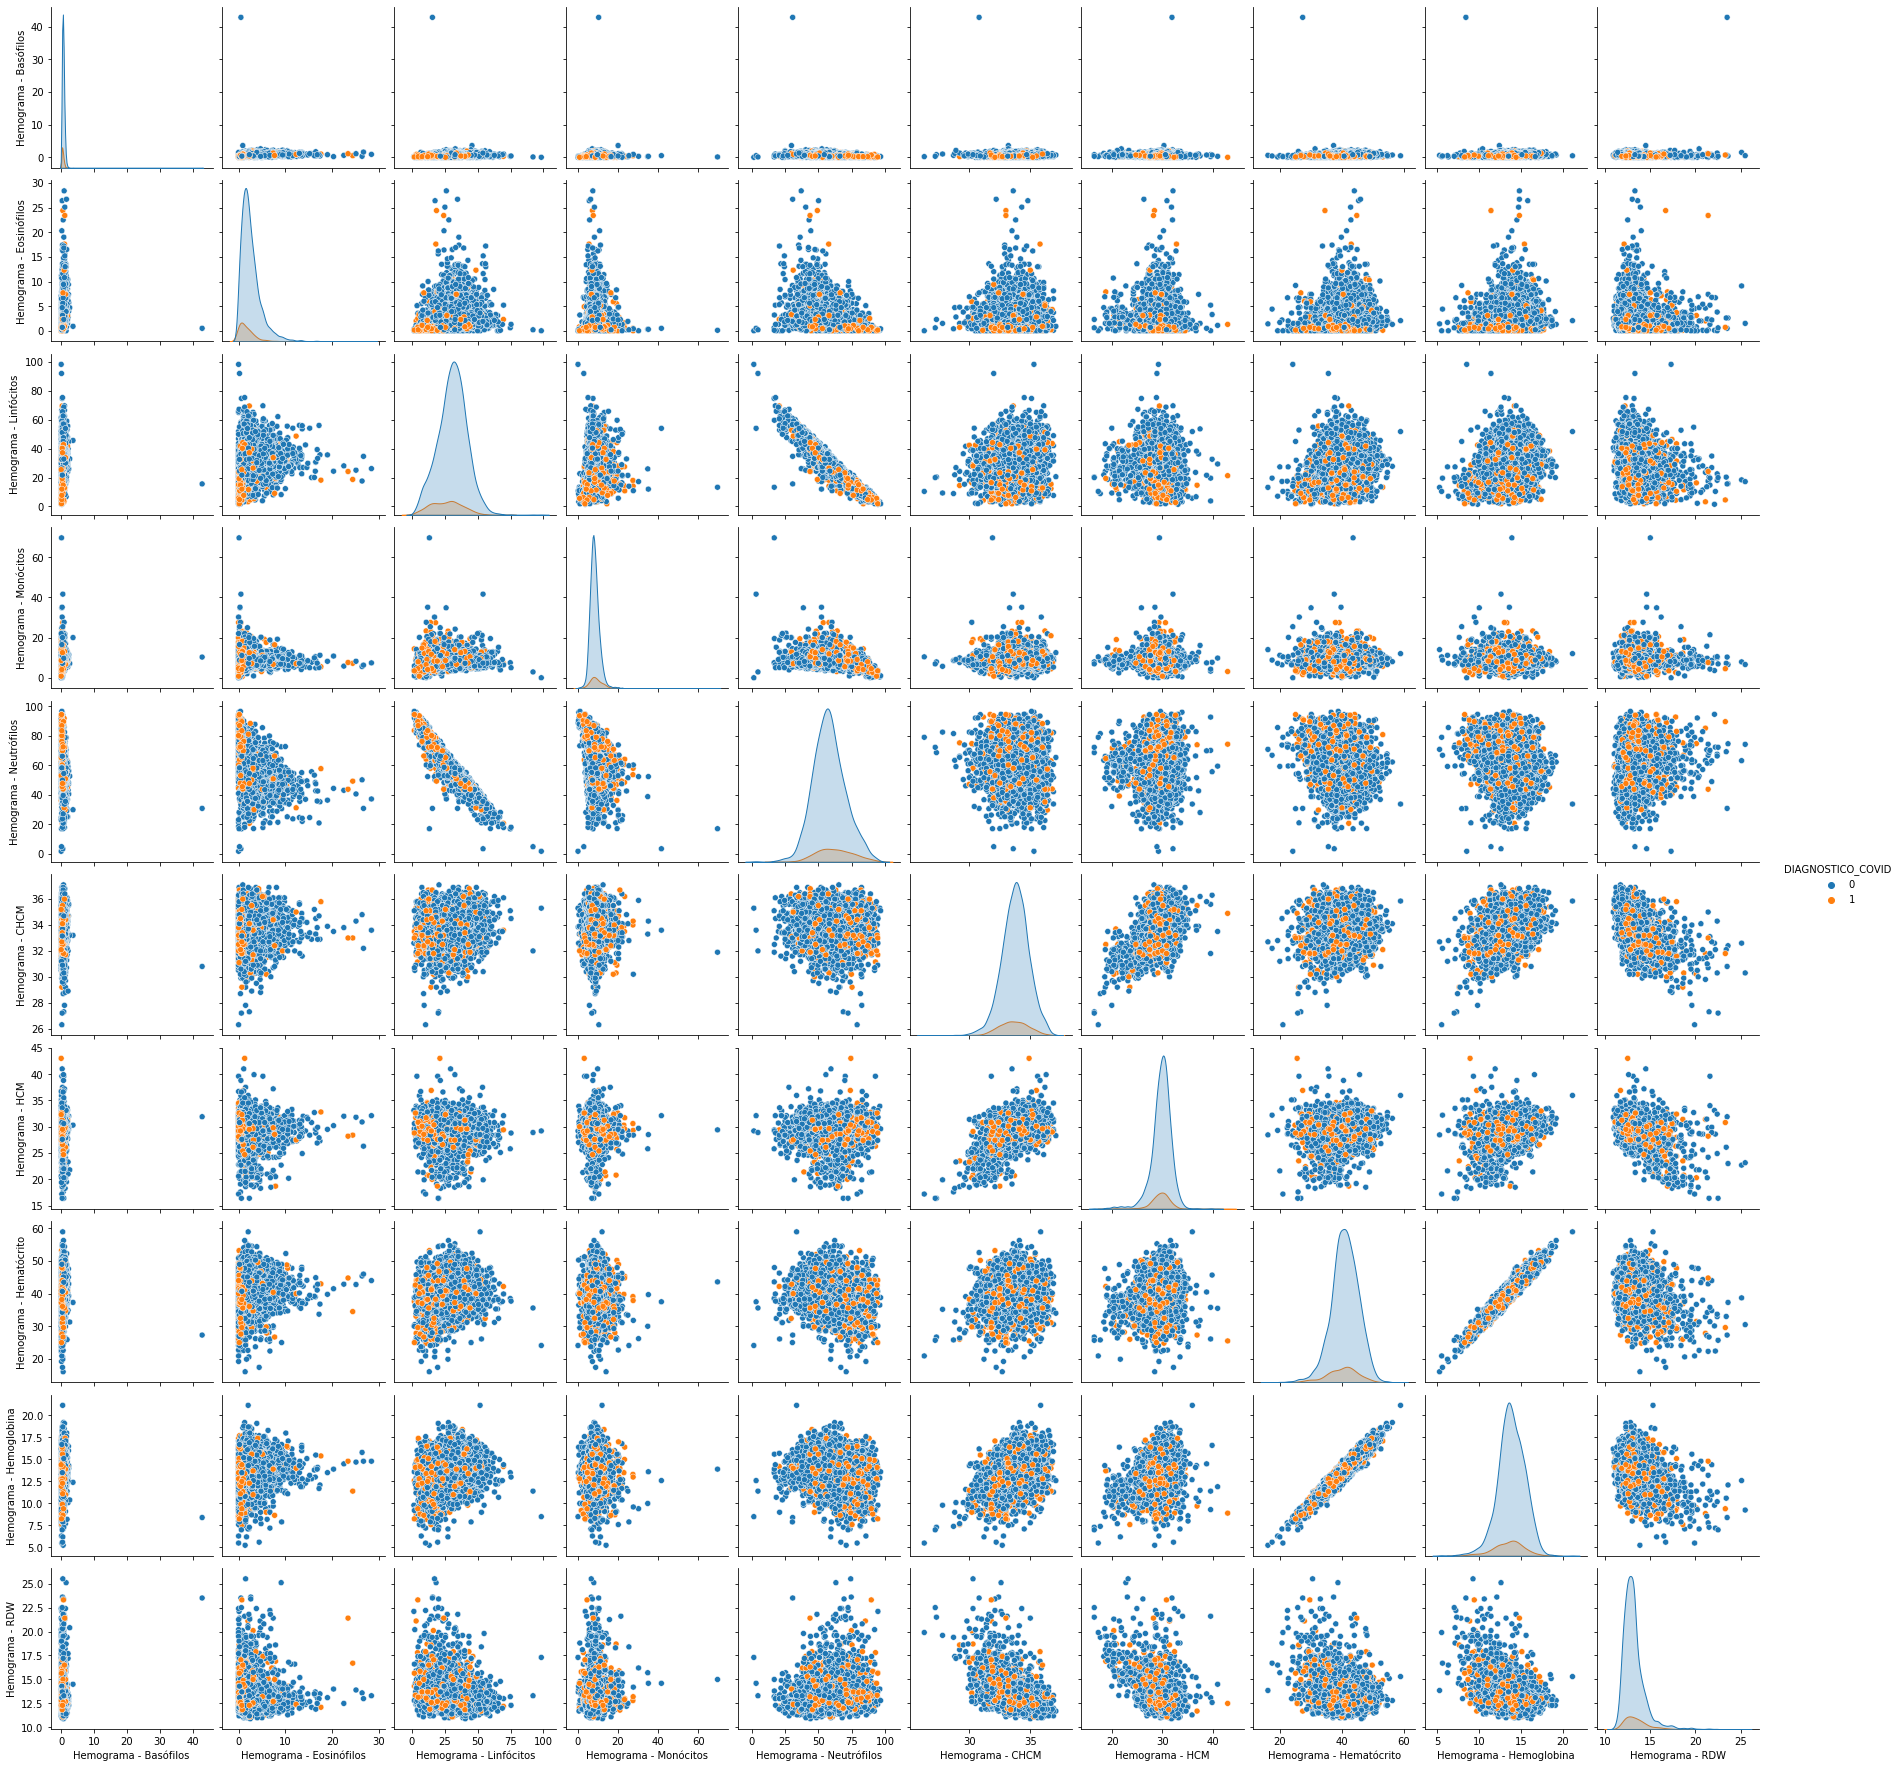

In [20]:
columns = df_desbalanceado.select_dtypes("float64").columns.to_list()[:10]
columns.extend(['DIAGNOSTICO_COVID'])
sns.pairplot(df_desbalanceado[columns], hue='DIAGNOSTICO_COVID')

# Experimentos - Dataset Desbalanceado

In [5]:
df_desbalanceado = df_desbalanceado.set_index(['ID_PACIENTE', 'DT_COLETA'])
cols_controle = ['HOSP', 'METODO_DIAGNOSTICO_COVID']
features = [col for col in df_desbalanceado.columns if col not in cols_controle]
df_desbalanceado[features]

SEXO  IDADE  \
ID_PACIENTE                              DT_COLETA                 
af8e03c6d1f5c266e77ae0021baaded2056e3e26 2020-08-01     1     14   
ec894d8e4f9dec4be5e52d6ce56d039f3db6a3db 2020-05-19     1     60   
9a2dd6715a9eb0a5f818478657549650bf22c4b1 2020-04-28     2     57   
322415cc50d9381321cf51fc56e7ac86eb2619a3 2020-06-16     2     29   
bae31e25b2ef721a237151405ccef0c926857823 2020-07-04     1     52   
...                                                   ...    ...   
01BF2C1CE92F3A21C7F742EE5B8D9C76         2020-04-06     2     59   
C54597AD0F849B514E3782C3E3035B93         2020-03-06     2     84   
                                         2020-05-30     2     84   
1A56403C9381401C2A764B3E01A6EE65         2020-04-17     2     56   
E6916272621AC6D6126E7594D0C27ADE         2020-07-05     2     72   

                                                     Hemograma - Basófilos  \
ID_PACIENTE                              DT_COLETA                           
af8e03c6d1f5c266e77ae0021baaded2056e3e26 2020-08-01                   0.30   
ec894d8e4f9dec4be5e52d6ce56d039f3db6a3db 2020-05-19                   1.00   
9a2dd6715a9eb0a5f818478657549650bf22c4b1 2020-04-28                   0.60   
322415cc50d9381321cf51fc56e7ac86eb2619a3 2020-06-16                   0.50   
bae31e25b2ef721a237151405ccef0c926857823 2020-07-04                   0.20   
...                                                                    ...   
01BF2C1CE92F3A21C7F742EE5B8D9C76         2020-04-06                   0.00   
C54597AD0F849B514E3782C3E3035B93         2020-03-06                   0.20   
                                         2020-05-30                   0.35   
1A56403C9381401C2A764B3E01A6EE65         2020-04-17                   0.40   
E6916272621AC6D6126E7594D0C27ADE         2020-07-05                   0.80   

                                                     Hemograma - Eosinófilos  \
ID_PACIENTE                              DT_COLETA                             
af8e03c6d1f5c266e77ae0021baaded2056e3e26 2020-08-01                      1.8   
ec894d8e4f9dec4be5e52d6ce56d039f3db6a3db 2020-05-19                      4.9   
9a2dd6715a9eb0a5f818478657549650bf22c4b1 2020-04-28                      0.2   
322415cc50d9381321cf51fc56e7ac86eb2619a3 2020-06-16                      5.1   
bae31e25b2ef721a237151405ccef0c926857823 2020-07-04                      0.8   
...                                                                      ...   
01BF2C1CE92F3A21C7F742EE5B8D9C76         2020-04-06                      0.7   
C54597AD0F849B514E3782C3E3035B93         2020-03-06                      0.7   
                                         2020-05-30                      0.7   
1A56403C9381401C2A764B3E01A6EE65         2020-04-17                      2.3   
E6916272621AC6D6126E7594D0C27ADE         2020-07-05                      2.3   

                                                     Hemograma - Linfócitos  \
ID_PACIENTE                              DT_COLETA                            
af8e03c6d1f5c266e77ae0021baaded2056e3e26 2020-08-01                    25.5   
ec894d8e4f9dec4be5e52d6ce56d039f3db6a3db 2020-05-19                    39.1   
9a2dd6715a9eb0a5f818478657549650bf22c4b1 2020-04-28                    14.0   
322415cc50d9381321cf51fc56e7ac86eb2619a3 2020-06-16                    33.5   
bae31e25b2ef721a237151405ccef0c926857823 2020-07-04                    28.6   
...                                                                     ...   
01BF2C1CE92F3A21C7F742EE5B8D9C76         2020-04-06                    25.5   
C54597AD0F849B514E3782C3E3035B93         2020-03-06                    12.0   
                                         2020-05-30                    21.7   
1A56403C9381401C2A764B3E01A6EE65         2020-04-17                    37.2   
E6916272621AC6D6126E7594D0C27ADE         2020-07-05                    32.8   

                                                     Hemograma - Monócitos  \
ID_PAC

In [6]:
X = df_desbalanceado[features]
y = df_desbalanceado['DIAGNOSTICO_COVID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=10, random_state=0, max_features=None)
models.append(("RandomForest2",rf2))


results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_train, y_train,  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

LogisticRegression 1.0
SVC 0.9947658479270408
KNeighbors 0.9931725072579994
DecisionTree 1.0
RandomForest 1.0
RandomForest2 1.0


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)
l_model = LogisticRegression()
l_model.fit(X_train,y_train)
y_pred = l_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1683
           1       1.00      1.00      1.00       201

    accuracy                           1.00      1884
   macro avg       1.00      1.00      1.00      1884
weighted avg       1.00      1.00      1.00      1884



In [9]:
pipeline = Pipeline([('normalizer', StandardScaler()), ('clf', LogisticRegression(solver='lbfgs', max_iter=1000))])
pipeline.steps

[('normalizer', StandardScaler()), ('clf', LogisticRegression(max_iter=1000))]

In [10]:
#Criando lista de modelos
clfs = [LogisticRegression(), SVC(), KNeighborsClassifier(n_neighbors=3), 
        DecisionTreeClassifier(criterion="entropy", max_depth = 4,random_state=10), 
        RandomForestClassifier(random_state=10),GradientBoostingClassifier(learning_rate=0.075, n_estimators=60, 
                                                  max_features='sqrt', subsample=0.8, random_state=10), 
        ExtraTreeClassifier(random_state=10), xgb.XGBClassifier(objective="binary:logistic", random_state=10)]

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.015640115737915038
score_time  mean  0.0066490650177001955
test_score  mean  1.0
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.10253114700317383
score_time  mean  0.018751239776611327
test_score  mean  0.9952205472671627
---------------------------------
KNeighborsClassifier(n_neighbors=3)
-----------------------------------
fit_time  mean  0.03199462890625
score_time  mean  0.17558207511901855
test_score  mean  0.9940831499866538
---------------------------------
DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)
-----------------------------------
fit_time  mean  0.009374618530273438
score_time  mean  0.0
test_score  mean  1.0
---------------------------------
RandomForestClassifier(random_state=10)
-----------------------------------
fit_time  mean  0.41553187370300293
score_time  mean  0.01874322891235351

# Experimentos - Undersampling

In [11]:
X = df_under[features]
y = df_under['DIAGNOSTICO_COVID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.020306110382080078
score_time  mean  0.004124975204467774
test_score  mean  1.0
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.023121166229248046
score_time  mean  0.006247997283935547
test_score  mean  0.9750706214689266
---------------------------------
KNeighborsClassifier(n_neighbors=3)
-----------------------------------
fit_time  mean  0.010065031051635743
score_time  mean  0.016614961624145507
test_score  mean  0.9456599897277863
---------------------------------
DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)
-----------------------------------
fit_time  mean  0.012498903274536132
score_time  mean  0.0
test_score  mean  1.0
---------------------------------
RandomForestClassifier(random_state=10)
-----------------------------------
fit_time  mean  0.21320509910583496
score_time  mean  0.018753767013